In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
from imutils import paths

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [6]:
dataset=r'C:\Users\atul kumar singh\pythonProject\dataset'
imagePaths = list(paths.list_images(dataset))

In [7]:
imagePaths

['C:\\Users\\atul kumar singh\\pythonProject\\dataset\\without_mask\\0.jpg',
 'C:\\Users\\atul kumar singh\\pythonProject\\dataset\\without_mask\\1.jpg',
 'C:\\Users\\atul kumar singh\\pythonProject\\dataset\\without_mask\\10.jpg',
 'C:\\Users\\atul kumar singh\\pythonProject\\dataset\\without_mask\\100.jpg',
 'C:\\Users\\atul kumar singh\\pythonProject\\dataset\\without_mask\\101.jpg',
 'C:\\Users\\atul kumar singh\\pythonProject\\dataset\\without_mask\\102.jpg',
 'C:\\Users\\atul kumar singh\\pythonProject\\dataset\\without_mask\\104.jpg',
 'C:\\Users\\atul kumar singh\\pythonProject\\dataset\\without_mask\\105.jpg',
 'C:\\Users\\atul kumar singh\\pythonProject\\dataset\\without_mask\\106.jpg',
 'C:\\Users\\atul kumar singh\\pythonProject\\dataset\\without_mask\\107.jpg',
 'C:\\Users\\atul kumar singh\\pythonProject\\dataset\\without_mask\\108.jpg',
 'C:\\Users\\atul kumar singh\\pythonProject\\dataset\\without_mask\\109.jpg',
 'C:\\Users\\atul kumar singh\\pythonProject\\dataset\\wi

In [8]:
#X-images
#y-labels
data=[]  #x
labels=[] #y

for i in imagePaths:
    label=i.split(os.path.sep)[-2] #it starts from back. the back end being -1 so -2 
    #will be without_mask.
    labels.append(label)
    image=load_img(i,target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)

In [9]:
labels

['without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask

In [43]:
# image=load_img(i,target_size=(224,224))
# image=img_to_array(image)
# image=preprocess_input(image)

In [10]:
image


array([[[ 0.6784314 ,  0.62352943,  0.48235297],
        [ 0.6627451 ,  0.62352943,  0.47450984],
        [ 0.654902  ,  0.6156863 ,  0.4666667 ],
        ...,
        [ 0.75686276,  0.64705884,  0.5764706 ],
        [ 0.77254903,  0.67058825,  0.6       ],
        [ 0.75686276,  0.6392157 ,  0.58431375]],

       [[ 0.6627451 ,  0.60784316,  0.4666667 ],
        [ 0.6627451 ,  0.6156863 ,  0.4901961 ],
        [ 0.67058825,  0.6156863 ,  0.4901961 ],
        ...,
        [ 0.78039217,  0.6784314 ,  0.60784316],
        [ 0.75686276,  0.654902  ,  0.58431375],
        [ 0.75686276,  0.654902  ,  0.5921569 ]],

       [[ 0.6627451 ,  0.60784316,  0.48235297],
        [ 0.67058825,  0.62352943,  0.49803925],
        [ 0.64705884,  0.5921569 ,  0.4666667 ],
        ...,
        [ 0.78039217,  0.67058825,  0.6       ],
        [ 0.7647059 ,  0.6627451 ,  0.5921569 ],
        [ 0.78039217,  0.67058825,  0.6       ]],

       ...,

       [[-0.09019607, -0.3960784 , -0.5137255 ],
        [-0

In [11]:
data

[array([[[-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         ...,
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.84313726, -0.8980392 , -0.77254903]],
 
        [[-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         ...,
         [-0.7647059 , -0.79607844, -0.6784314 ],
         [-0.7647059 , -0.79607844, -0.6784314 ],
         [-0.75686276, -0.7882353 , -0.67058825]],
 
        [[-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         ...,
         [-0.88235295, -0.8980392 , -0.7882353 ],
         [-0.8666667 , -0.88235295, -0.77254903],
         [-0.85882354, -0.8745098 , -0.7647059 ]],
 
        ...,
 
        [[ 0.3803922 , -0.9607843 

In [12]:
data = np.array(data,dtype='float32')
labels= np.array(labels)

In [13]:
data

array([[[[-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         ...,
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.84313726, -0.8980392 , -0.77254903]],

        [[-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         ...,
         [-0.7647059 , -0.79607844, -0.6784314 ],
         [-0.7647059 , -0.79607844, -0.6784314 ],
         [-0.75686276, -0.7882353 , -0.67058825]],

        [[-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         ...,
         [-0.88235295, -0.8980392 , -0.7882353 ],
         [-0.8666667 , -0.88235295, -0.77254903],
         [-0.85882354, -0.8745098 , -0.7647059 ]],

        ...,

        [[ 0.3803922 , -0.9607843 , -0

In [14]:
labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [16]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)

In [15]:
labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [17]:
#labels is in machine readable language
#data is in machine readable language now
# training of the model
train_X,test_X,train_Y,test_Y=train_test_split(data,labels,test_size=0.20,random_state=10,stratify=labels)

In [18]:
train_X.shape

(1100, 224, 224, 3)

In [19]:
train_Y.shape

(1100, 2)

In [20]:
test_X.shape

(276, 224, 224, 3)

In [21]:
test_Y.shape

(276, 2)

In [22]:
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')

In [23]:
aug

In [24]:
baseModel=MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

In [25]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [26]:
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='softmax')(headModel)

model=Model(inputs=baseModel.input,outputs=headModel)


In [27]:
for layer in baseModel.layers:
    layer.trainable=False

In [28]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [29]:
#laerning rate of the model
learning_rate=0.0001
Epochs=20
BS=12

opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
H=model.fit(
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(test_X,test_Y),
    validation_steps=len(test_X)//BS,
    epochs=Epochs
)

model.save(r'H:\face mask detector\model.h5')

Epoch 1/20
91/91 [==============================] - 59s 647ms/step - loss: 0.4908 - accuracy: 0.7564 - val_loss: 0.1094 - val_accuracy: 0.9746
Epoch 2/20
91/91 [==============================] - 48s 528ms/step - loss: 0.1811 - accuracy: 0.9421 - val_loss: 0.0628 - val_accuracy: 0.9819
Epoch 3/20
91/91 [==============================] - 47s 511ms/step - loss: 0.1153 - accuracy: 0.9651 - val_loss: 0.0525 - val_accuracy: 0.9783
Epoch 4/20
91/91 [==============================] - 46s 505ms/step - loss: 0.0855 - accuracy: 0.9752 - val_loss: 0.0505 - val_accuracy: 0.9783
Epoch 5/20
91/91 [==============================] - 65s 710ms/step - loss: 0.0838 - accuracy: 0.9752 - val_loss: 0.0445 - val_accuracy: 0.9855
Epoch 6/20
91/91 [==============================] - 50s 548ms/step - loss: 0.0680 - accuracy: 0.9798 - val_loss: 0.0432 - val_accuracy: 0.9819
Epoch 7/20
91/91 [==============================] - 49s 536ms/step - loss: 0.0746 - accuracy: 0.9733 - val_loss: 0.0386 - val_accuracy: 0.9855

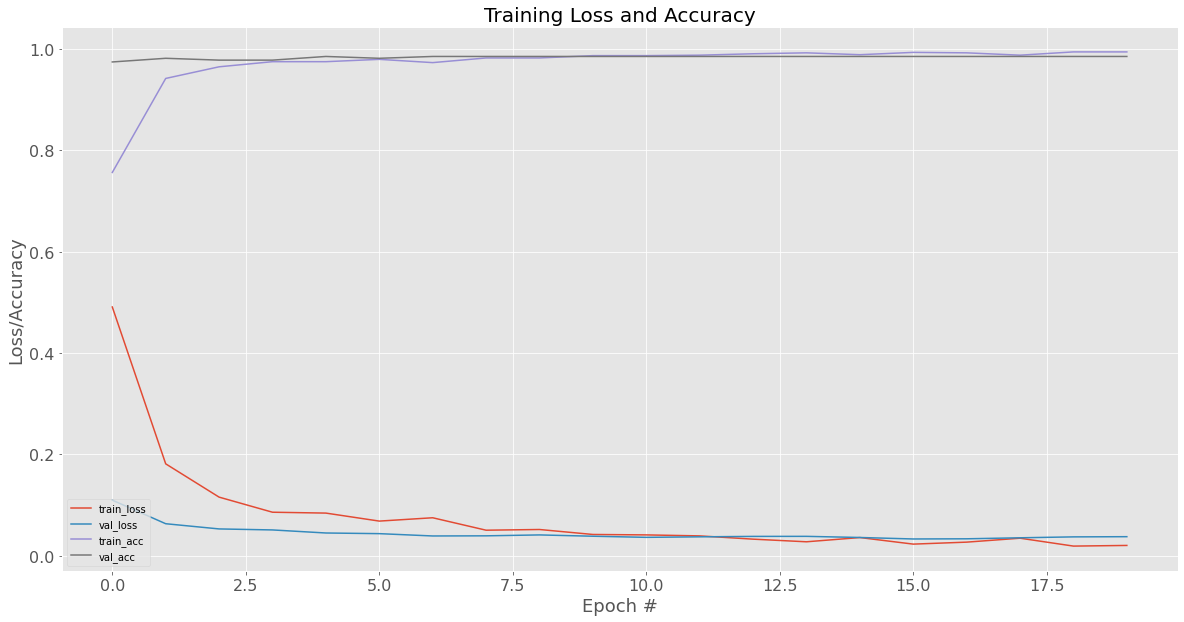

In [40]:
# plot the training loss and accuracy
N = Epochs
plt.style.use("ggplot")
plt.figure(figsize=(20,10))

plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy",fontsize=20)
plt.xlabel("Epoch #",fontsize=18)
plt.ylabel("Loss/Accuracy",fontsize=18)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20) 
plt.legend(loc="lower left")
plt.savefig(r'H:\face mask detector\graph.jpg')

In [41]:
predict=model.predict(test_X,batch_size=BS)
predict=np.argmax(predict,axis=1)
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       138
without_mask       0.99      0.99      0.99       138

    accuracy                           0.99       276
   macro avg       0.99      0.99      0.99       276
weighted avg       0.99      0.99      0.99       276

